In [ ]:
# deliveries csv with - order id, timestamp and status
# order_items csv with -order_id, items_ordered
# orders csv with order_id, order_placed_at
# products csv with item_id, category, item, size and price

import pandas as pd
deliveries_df = pd.read_csv("/content/deliveries.csv")
order_items_df = pd.read_csv("/content/order_items.csv")
orders_df = pd.read_csv("/content/orders.csv")
products_df = pd.read_csv("/content/products.csv")

In [ ]:
deliveries_df.head()

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery


In [ ]:
deliveries_df['status'].unique()

array(['Pending', 'Out For Delivery', 'Delivered'], dtype=object)

In [ ]:
deliveries_df.shape

(1363008, 3)

In [ ]:
deliveries_df.isnull().sum()

order_id      0
time_stamp    0
status        0
dtype: int64

In [ ]:
order_items_df.head()

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"


In [ ]:
order_items_df.isnull().sum()

order_id         0
items_ordered    0
dtype: int64

In [ ]:
orders_df.head()

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20


In [ ]:
orders_df.isnull().sum()

order_id           0
order_placed_at    0
dtype: int64

In [ ]:
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')

merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])
merged_df['order_placed_at'] = pd.to_datetime(merged_df['order_placed_at'])

merged_df['delivery_time'] = (merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60
delivered_orders_df = merged_df[merged_df['status'] == 'Delivered']
average_delivery_time = round(delivered_orders_df['delivery_time'].mean(), 2)
print("Average Delivery Time for Pizza Orders:", average_delivery_time, "minutes")


Average Delivery Time for Pizza Orders: 20.65 minutes


In [ ]:
percentile_99_delivery_time = round(delivered_orders_df['delivery_time'].quantile(0.99), 2)

print("99th Percentile Delivery Time for all Orders:", percentile_99_delivery_time, "minutes")

99th Percentile Delivery Time for all Orders: 30.9 minutes


In [ ]:
max_delivery_time_row = merged_df.loc[merged_df['delivery_time'].idxmax()]
order_id_max_delivery_time = max_delivery_time_row['order_id']

print("Order ID with the Maximum Delivery Time:", order_id_max_delivery_time)

Order ID with the Maximum Delivery Time: 321629049


In [ ]:
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')
merged_df = pd.merge(merged_df, order_items_df, on='order_id')
merged_df['order_placed_at'] = pd.to_datetime(merged_df['order_placed_at'], format='%Y-%m-%d %H:%M:%S')
january_orders_df = merged_df[(merged_df['order_placed_at'] >= '2024-01-01') & (merged_df['order_placed_at'] <= '2024-01-31') & (merged_df['status']=='Delivered')]
january_orders_df['items_ordered'] = january_orders_df['items_ordered'].apply(lambda x: x.replace('p_037', ''))
print(january_orders_df)
num_pizzas_ordered = january_orders_df['items_ordered'].str.count('p_0').sum()

print("Number of Pizzas Ordered between January 1st and January 31st, 2024:", num_pizzas_ordered)


          order_id                     time_stamp     status  \
1326098  321672146  2024-01-01 00:21:44.105365820  Delivered   
1326101  321672147  2024-01-01 00:31:05.366818534  Delivered   
1326104  321672148  2024-01-01 00:31:30.702273281  Delivered   
1326107  321672149  2024-01-01 00:38:28.968308274  Delivered   
1326110  321672150  2024-01-01 00:35:59.546601236  Delivered   
...            ...                            ...        ...   
1361765  321684035  2024-01-30 23:34:22.107470052  Delivered   
1361768  321684036  2024-01-31 00:03:26.149642952  Delivered   
1361771  321684037  2024-01-31 00:08:18.420687791  Delivered   
1361774  321684038  2024-01-31 00:08:53.167344892  Delivered   
1361777  321684039  2024-01-31 00:15:03.186348348  Delivered   

            order_placed_at           items_ordered  
1326098 2024-01-01 00:02:30           ['p_020', '']  
1326101 2024-01-01 00:08:01  ['p_004', 'p_031', '']  
1326104 2024-01-01 00:13:57  ['p_009', 'p_002', '']  
1326107 2024-01

<ipython-input-41-fc9a36d2231a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_orders_df['items_ordered'] = january_orders_df['items_ordered'].apply(lambda x: x.replace('p_037', ''))


In [ ]:
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])
merged_df['delivery_time'] = (merged_df['time_stamp'] - pd.to_datetime(merged_df['order_placed_at'], format='%Y-%m-%d %H:%M:%S')).dt.total_seconds() / 60
january_orders_df = merged_df[(merged_df['order_placed_at'] >= '2024-01-01') & (merged_df['order_placed_at'] <= '2024-01-31')]

num_orders_gt_30_minutes = january_orders_df[january_orders_df['delivery_time'] > 30].shape[0]
print("Number of orders took more than 30 minutes to deliver between 1st January and 31st January 2024:", num_orders_gt_30_minutes)


Number of orders took more than 30 minutes to deliver between 1st January and 31st January 2024: 162


In [ ]:
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])

merged_df['order_placed_at'] = pd.to_datetime(merged_df['order_placed_at'], format='%Y-%m-%d %H:%M:%S')

merged_df['delivery_time'] = (merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60

filtered_df = merged_df[(merged_df['status'] == 'Delivered') &
                        (merged_df['delivery_time'] > 30) &
                        (merged_df['order_placed_at'].dt.year == 2023)]

exploded_order_items_df = order_items_df.assign(items_ordered=order_items_df['items_ordered'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(', ')).explode('items_ordered')

merged_items_df = pd.merge(exploded_order_items_df, filtered_df, on='order_id')

total_price = 0

for item_id in merged_items_df['items_ordered']:
    product_row = products_df[products_df['item_id'] == item_id]
    if not product_row.empty:
        total_price += product_row['Price'].iloc[0]

print("Total price of items ordered in 2023 with delivery time > 30 minutes:", total_price)


<ipython-input-53-86a6b03ffe86>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exploded_order_items_df = order_items_df.assign(items_ordered=order_items_df['items_ordered'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(', ')).explode('items_ordered')


Total price of items ordered in 2023 with delivery time > 30 minutes: 1826393


In [ ]:
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])

merged_df['order_placed_at'] = pd.to_datetime(merged_df['order_placed_at'], format='%Y-%m-%d %H:%M:%S')

merged_df['delivery_time'] = (merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60

filtered_df = merged_df[(merged_df['status'] == 'Delivered') &
                        (merged_df['delivery_time'] > 30) ]

exploded_order_items_df = order_items_df.assign(items_ordered=order_items_df['items_ordered'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(', ')).explode('items_ordered')

df = pd.merge(exploded_order_items_df, filtered_df, on='order_id')

df['time_stamp'] = pd.to_datetime(df['time_stamp'])

grouped_by_year = df.groupby(df['time_stamp'].dt.year)

result_by_year = {}

for year, group in grouped_by_year:
    total_price_year = 0

    for item in group['items_ordered']:
        price = products_df[products_df['item_id'] == item]['Price'].values[0]
        total_price_year += price

    result_by_year[year] = total_price_year

count=0
print("Total prices by year:")
for year, total_price_year in result_by_year.items():
    count+=total_price_year
    print(f"Year {year}: {total_price_year:.2f}")

print(count)

<ipython-input-72-e06c45690b2c>:16: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exploded_order_items_df = order_items_df.assign(items_ordered=order_items_df['items_ordered'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(', ')).explode('items_ordered')


Total prices by year:
Year 2020: 96688.00
Year 2021: 1791568.00
Year 2022: 1664113.00
Year 2023: 1826393.00
Year 2024: 145669.00
5524431


In [ ]:

merged_df = pd.merge(deliveries_df, orders_df, on='order_id')
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])

merged_df['order_placed_at'] = pd.to_datetime(merged_df['order_placed_at'], format='%Y-%m-%d %H:%M:%S')

merged_df['delivery_time'] = (merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60

filtered_df = merged_df[(merged_df['status'] == 'Delivered') &
                        (merged_df['delivery_time'] <= 30) ]

exploded_order_items_df = order_items_df.assign(items_ordered=order_items_df['items_ordered'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(', ')).explode('items_ordered')

merged_items_df = pd.merge(exploded_order_items_df, filtered_df, on='order_id')
print(merged_items_df)
total_price = 0

for item_id in merged_items_df['items_ordered']:
    product_row = products_df[products_df['item_id'] == item_id]
    if not product_row.empty:
        total_price += product_row['Price'].iloc[0]

print("Total price of items ordered in 2023 with delivery time < 30 minutes:", total_price-count)

<ipython-input-73-a9c6e9d24469>:17: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  exploded_order_items_df = order_items_df.assign(items_ordered=order_items_df['items_ordered'].str.replace("'", "").str.replace("[", "").str.replace("]", "").str.split(', ')).explode('items_ordered')


          order_id items_ordered                    time_stamp     status  \
0        321230114         p_025 2020-12-11 00:19:13.299151076  Delivered   
1        321230114         p_032 2020-12-11 00:19:13.299151076  Delivered   
2        321230114         p_037 2020-12-11 00:19:13.299151076  Delivered   
3        321230115         p_017 2020-12-11 00:59:18.054846609  Delivered   
4        321230115         p_012 2020-12-11 00:59:18.054846609  Delivered   
...            ...           ...                           ...        ...   
1143307  321684448         p_007 2024-02-01 00:17:50.996900711  Delivered   
1143308  321684448         p_003 2024-02-01 00:17:50.996900711  Delivered   
1143309  321684448         p_037 2024-02-01 00:17:50.996900711  Delivered   
1143310  321684449         p_022 2024-02-01 00:14:56.997433391  Delivered   
1143311  321684449         p_037 2024-02-01 00:14:56.997433391  Delivered   

            order_placed_at  delivery_time  
0       2020-12-11 00:01:29   

Bonus question :

Poission distribution can be used to model this data.

The pizza store owner can now be ready with all the basic materials he need for making the pizza and the staff optimization for the same (maybe hiring more people in the peak time). This will reduce the time utilised for making the pizza i.e reduce the time between order received and the out for delivery instances, hence delivering the order on time and reducing the loss.


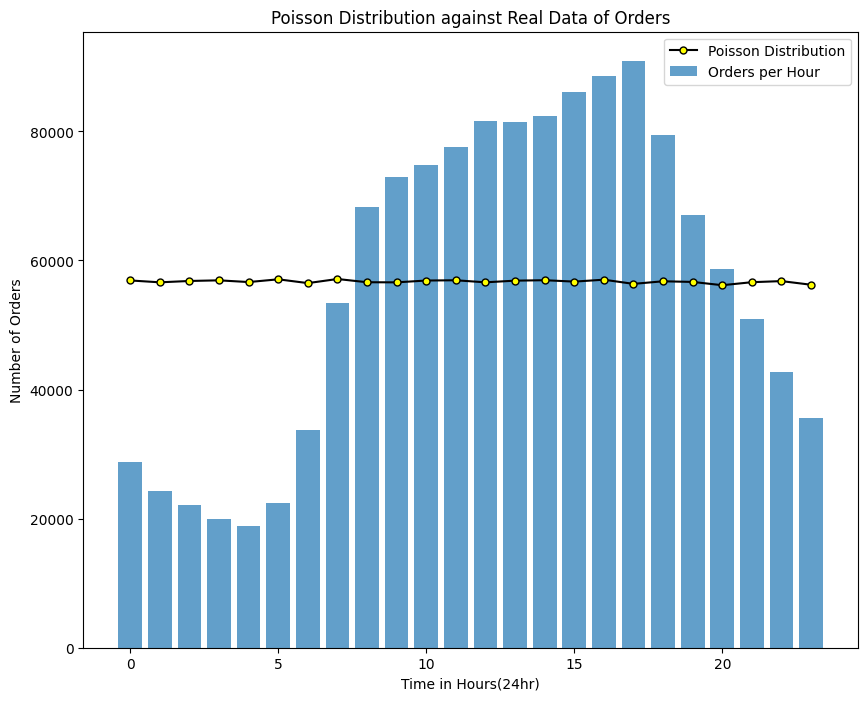

In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Merge deliveries and orders on order_id
merged_df = pd.merge(deliveries_df, orders_df, on='order_id')

# Convert timestamp to datetime
merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'])

# Assuming this is the start of the code for grouping and analysis
grouped_df = merged_df.copy()
grouped_df['Hour'] = grouped_df['time_stamp'].dt.hour

# Calculate the number of orders for each hour, month, and year
orders_per_hour = grouped_df['order_id'].groupby(grouped_df['Hour']).count()

lambda_ = orders_per_hour.mean()

dist = poisson(lambda_)

x = np.random.poisson(lambda_, size=len(orders_per_hour))
plt.figure(figsize=(10, 8))
plt.bar(orders_per_hour.index, orders_per_hour, label='Orders per Hour', alpha=0.7)
plt.plot(orders_per_hour.index, x, label='Poisson Distribution', color='black', linestyle='solid', marker='o', markerfacecolor='yellow', markersize=5)
plt.title('Poisson Distribution against Real Data of Orders')
plt.xlabel('Time in Hours(24hr)')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()

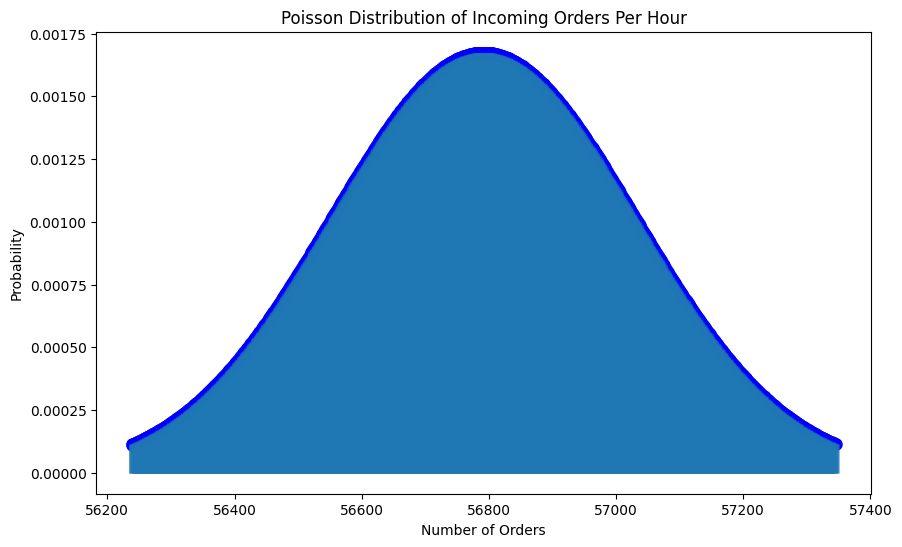

In [ ]:
x = np.arange(poisson.ppf(0.01, lambda_), poisson.ppf(0.99, lambda_))
plt.figure(figsize=(10,6))
plt.plot(x, dist.pmf(x), 'bo', ms=8, label='poisson pmf')
plt.vlines(x, 0, dist.pmf(x), lw=5, alpha=0.5)
plt.xlabel('Number of Orders')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Incoming Orders Per Hour')
plt.show()